In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



# Classifier Algorithms Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [169]:
df=pd.read_csv(r"C:\Users\acer\Downloads\Customer-Churn Capstone.csv")

In [74]:
# Length of the dataset
len(df)

7043

In [15]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [76]:
# Display columns with missing values
missing_values = df.isnull().sum()

missing_values[missing_values > 0].index

Index([], dtype='object')

In [77]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [170]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [171]:
# Check for missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


###  Exploratory Data Analysis (EDA) 

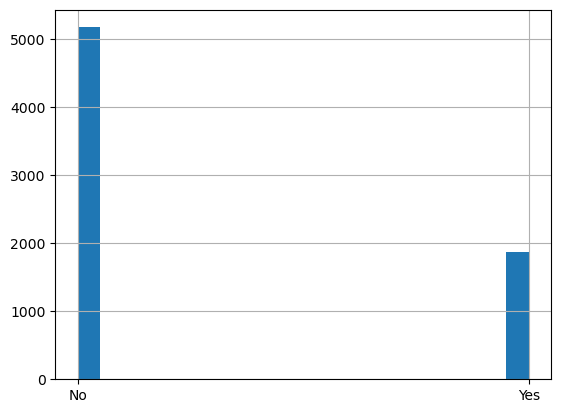

In [172]:
df['Churn'].hist(bins=20,);


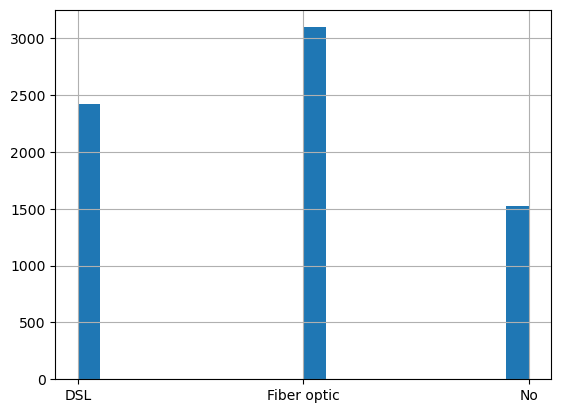

In [173]:
# Convert the "InternetService" column to string
df['InternetService'] = df['InternetService'].astype(str)

df['InternetService'].hist(bins=20,);

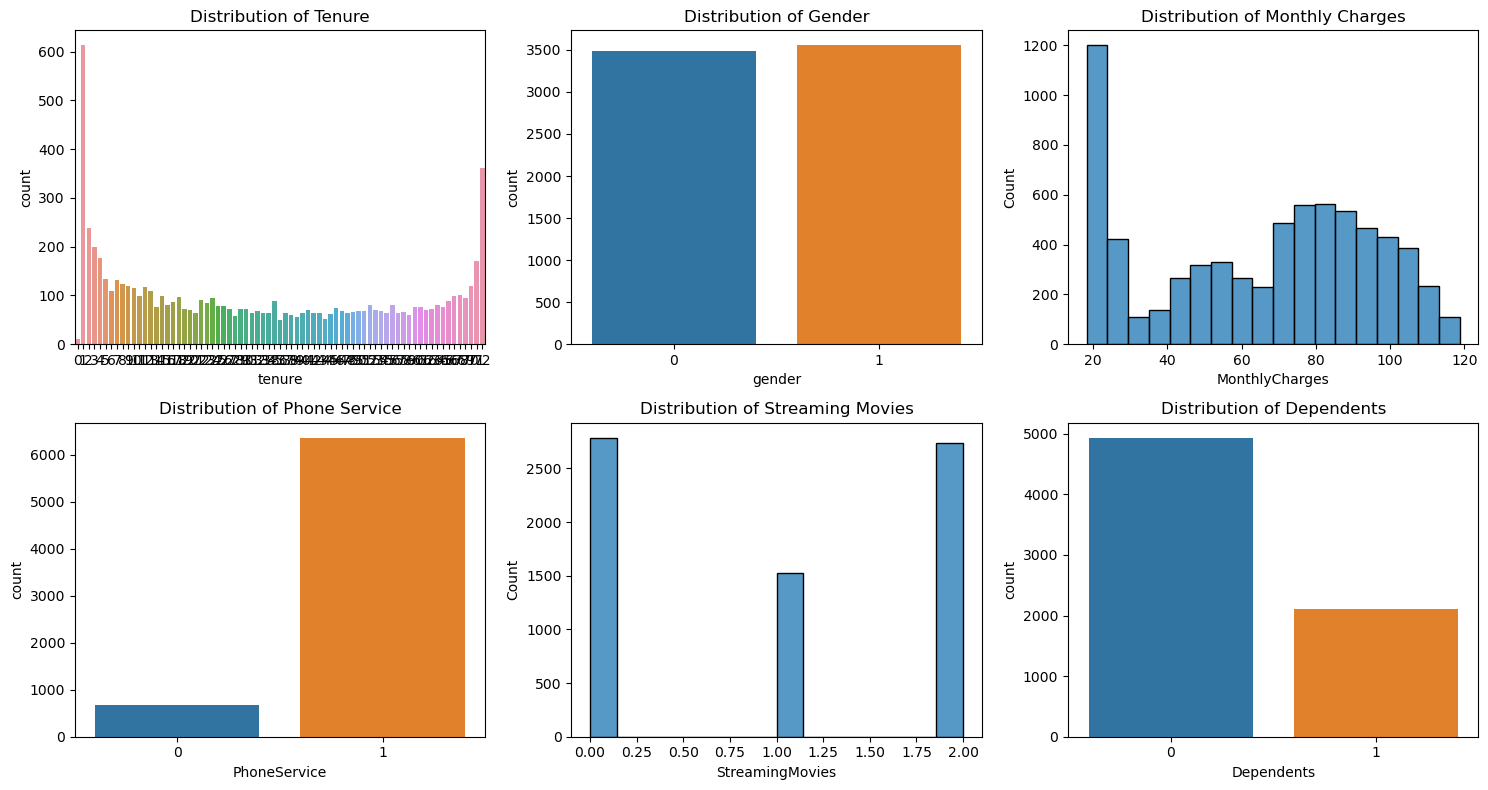

In [205]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

plt1 = sns.countplot(x='tenure', data=df, ax=axs[0, 0])
plt1.set_title('Distribution of Tenure')

plt2 = sns.countplot(x='gender', data=df, ax=axs[0, 1])
plt2.set_title('Distribution of Gender')

plt3 = sns.histplot(df['MonthlyCharges'], ax=axs[0, 2])
plt3.set_title('Distribution of Monthly Charges')

plt4 = sns.countplot(x='PhoneService', data=df, ax=axs[1, 0])
plt4.set_title('Distribution of Phone Service')

plt5 = sns.histplot(x='StreamingMovies', data=df, ax=axs[1, 1])
plt5.set_title('Distribution of Streaming Movies')

plt6 = sns.countplot(x='Dependents', data=df, ax=axs[1, 2])
plt6.set_title('Distribution of Dependents')

plt.tight_layout()
plt.show()


In [174]:
# Calculate IQR for each column
columns_to_check = df[["SeniorCitizen","Partner","tenure","MultipleLines","StreamingTV","MonthlyCharges","Churn"]]

In [175]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert string columns to integers using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':  # Check if column contains strings
        df[column] = label_encoder.fit_transform(df[column])

# Calculate IQR for each column
columns_to_check = df[["SeniorCitizen", "Partner", "tenure", "MultipleLines", "StreamingTV", "MonthlyCharges", "Churn"]]


In [176]:
columns_to_check = df[["SeniorCitizen", "Partner", "tenure", "MultipleLines", "StreamingTV", "MonthlyCharges", "Churn"]]

In [177]:
Q1 = columns_to_check.quantile(0.25)
Q1

SeniorCitizen      0.0
Partner            0.0
tenure             9.0
MultipleLines      0.0
StreamingTV        0.0
MonthlyCharges    35.5
Churn              0.0
Name: 0.25, dtype: float64

In [88]:
Q3 = columns_to_check.quantile(0.75)
Q3

SeniorCitizen      0.00
Partner            1.00
tenure            55.00
MultipleLines      2.00
StreamingTV        2.00
MonthlyCharges    89.85
Churn              1.00
Name: 0.75, dtype: float64

In [89]:
IQR = Q3 - Q1
IQR

SeniorCitizen      0.00
Partner            1.00
tenure            46.00
MultipleLines      2.00
StreamingTV        2.00
MonthlyCharges    54.35
Churn              1.00
dtype: float64

In [ ]:
#Bivariate Analysis

<Figure size 600x400 with 0 Axes>

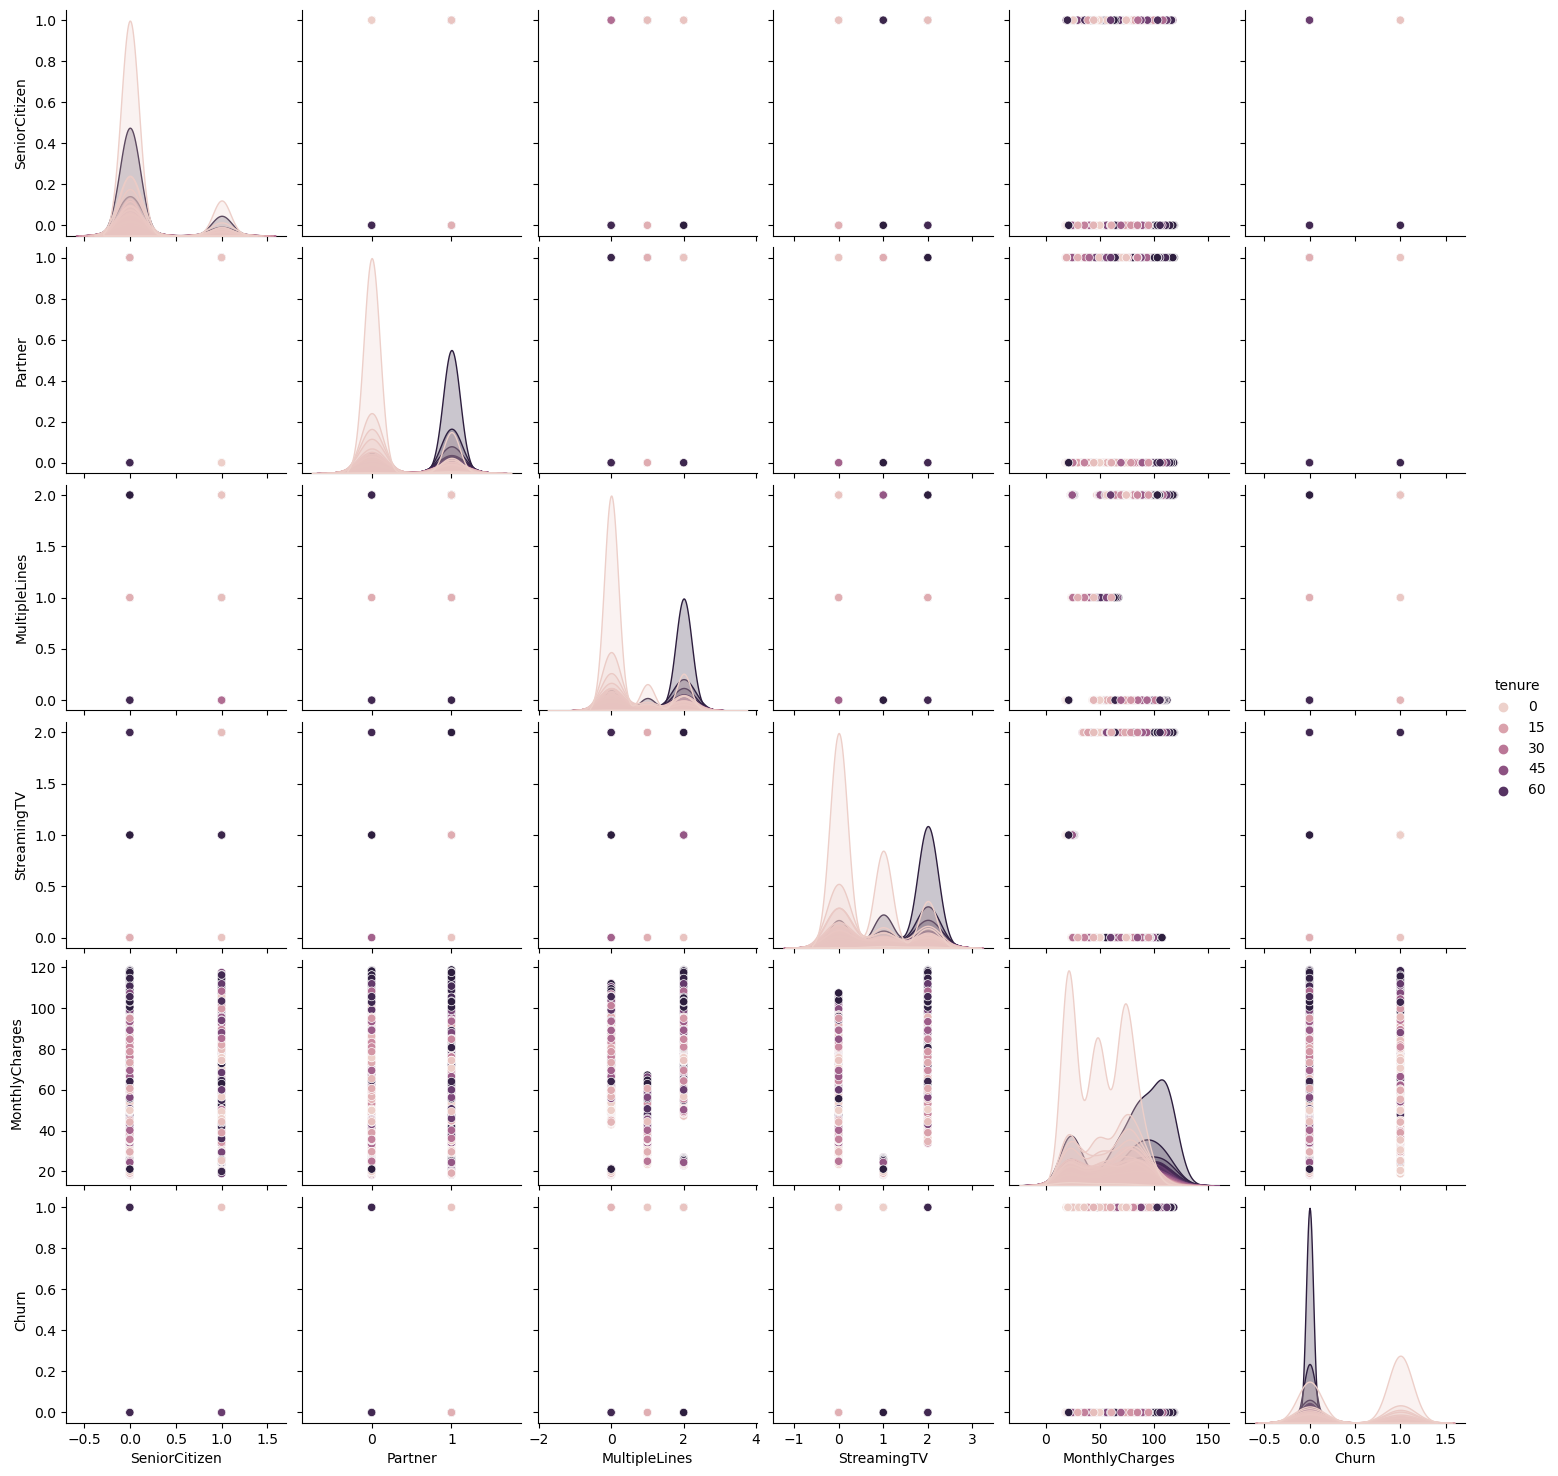

In [178]:
# Bivariate analysis - Pairplot
plt.figure(figsize=(6,4))
columns_to_check = ["SeniorCitizen", "Partner", "tenure", "MultipleLines", "StreamingTV", "MonthlyCharges", "Churn"]
sns.pairplot(df[columns_to_check], hue="tenure")
plt.show()

In [25]:
columns_to_check.head()

,SeniorCitizen,Partner,tenure,MultipleLines,StreamingTV,MonthlyCharges,Churn
0,0,1,1,1,0,29.85,0
1,0,0,34,0,0,56.95,0
2,0,0,2,0,0,53.85,1
3,0,0,45,1,0,42.30,0
4,0,0,2,0,0,70.70,1


In [29]:
df["SeniorCitizen"]

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

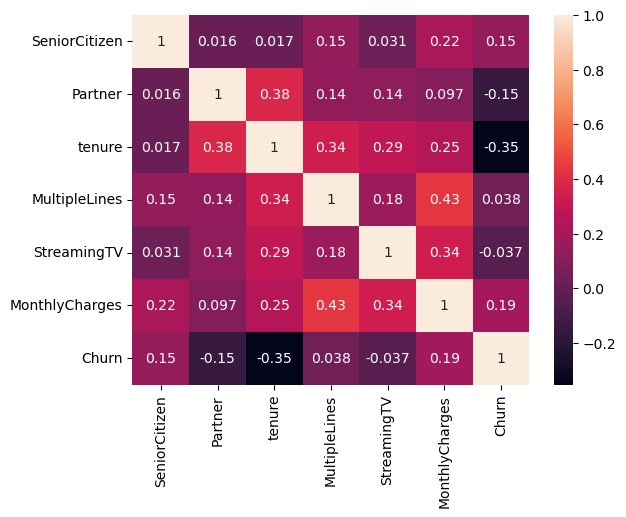

In [179]:
# Multivariate analysis - Correlation Heatmap

correlation_table = df[columns_to_check].corr()

sns.heatmap(correlation_table, annot=True)
plt.show()

In [63]:
df["PaymentMethod"]

0       2
1       3
2       3
3       0
4       2
       ..
7038    3
7039    1
7040    2
7041    3
7042    0
Name: PaymentMethod, Length: 7043, dtype: int32

In [65]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,6530.000000,1.000000


In [71]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

## Feature Engineering and Data preprocessing

In [180]:
# tenure
#df["tenure_duration"] = pd.cut(df["tenure"], bins=[0, 24, 48, 72, float('inf')], labels=['month', 'two_years', 'four_years','six_years'])
#df["tenure_duration"].value_counts()

# Define bins and labels for tenure duration
bins = [0, 24, 48, 72, float('inf')]
labels = ['month', 'two_years', 'four_years', 'six_years']

# Cut the "tenure" column into tenure duration categories
df["tenure_duration"] = pd.cut(df["tenure"], bins=bins, labels=labels)

# Display the count of each tenure duration category
df["tenure_duration"].value_counts()


tenure_duration
month         3199
four_years    2239
two_years     1594
six_years        0
Name: count, dtype: int64

In [181]:
df['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

In [112]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration,Total_Charges
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,2505,0,month,low_charges
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1466,0,two_years,low_charges
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,1,3,53.85,157,1,month,extremely_low_charges
3,5535,1,0,0,0,45,0,1,0,2,...,0,0,1,0,0,42.30,1400,0,two_years,low_charges
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,1,2,70.70,925,1,month,extremely_low_charges


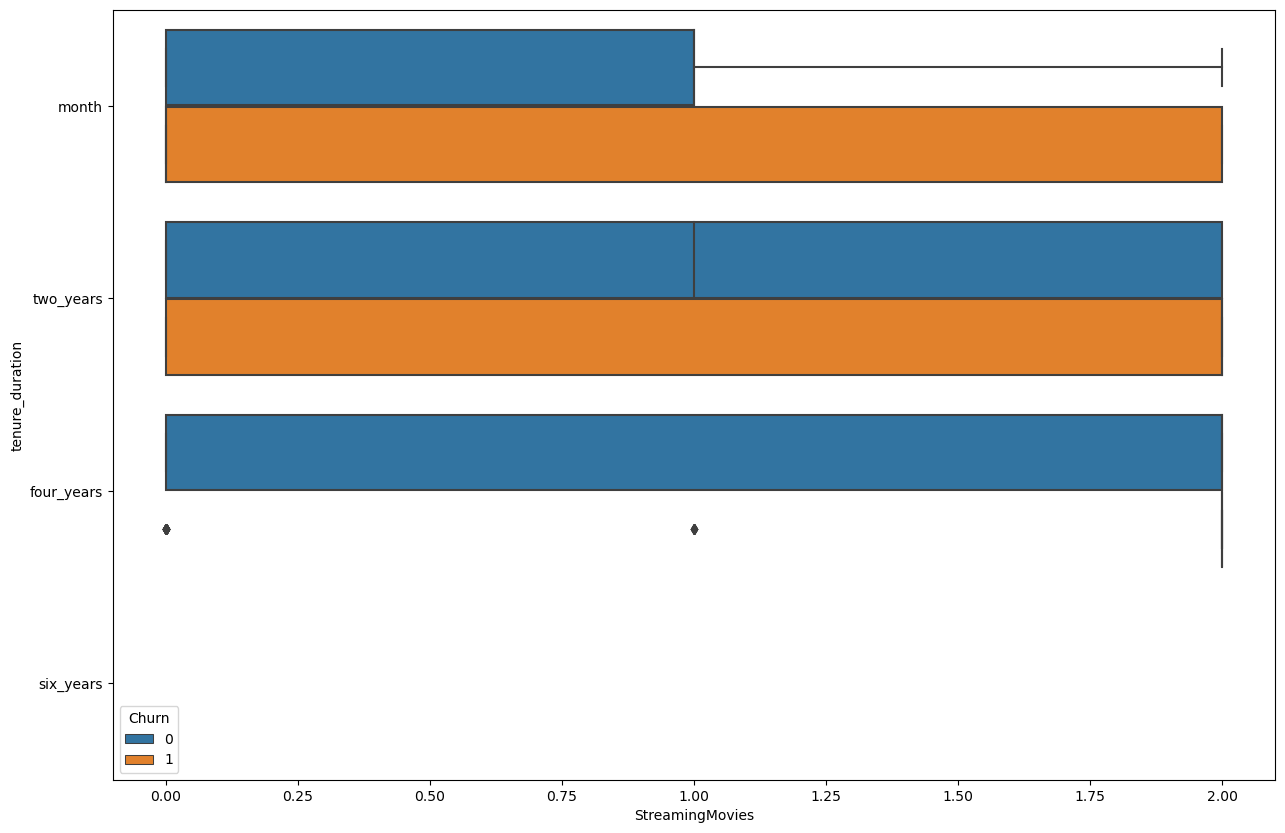

In [96]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='StreamingMovies', y= 'tenure_duration', hue='Churn', data=df);

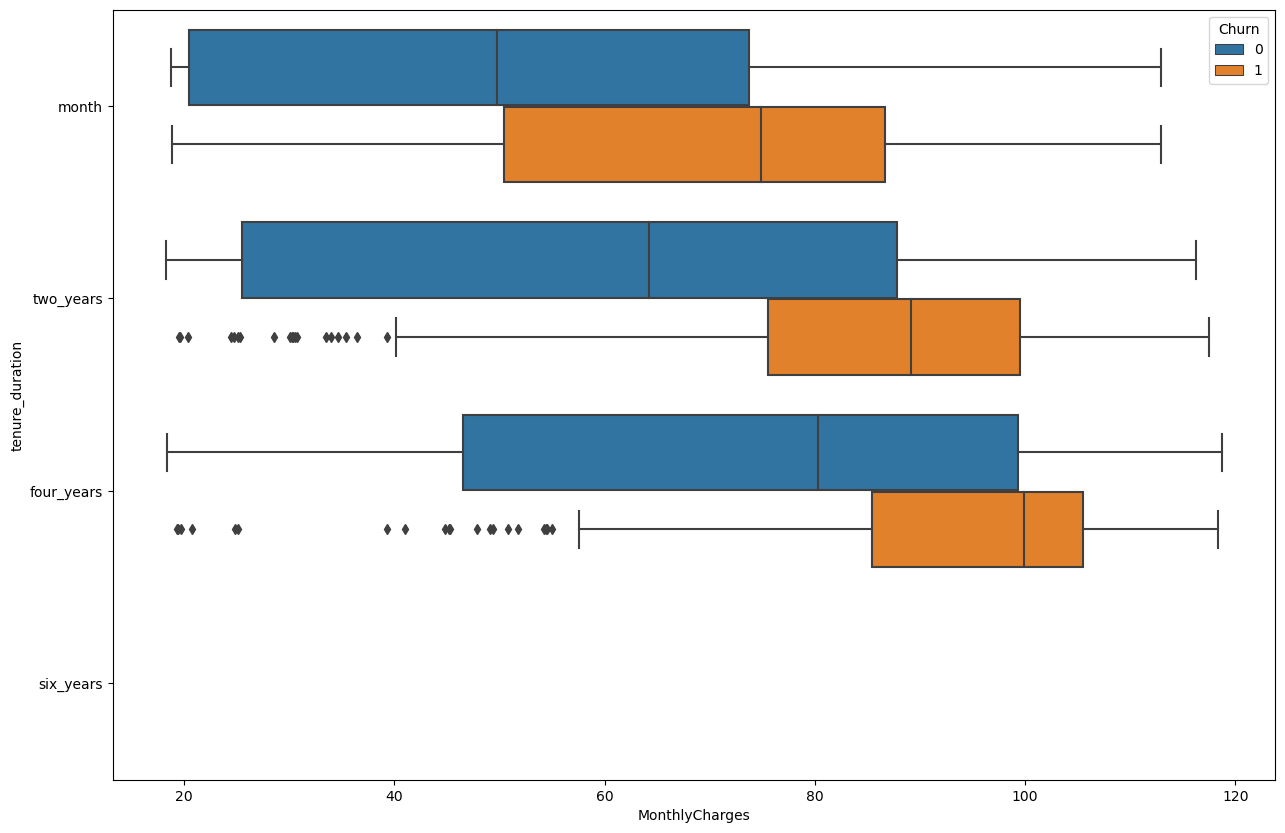

In [97]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='MonthlyCharges', y= 'tenure_duration', hue='Churn', data=df);

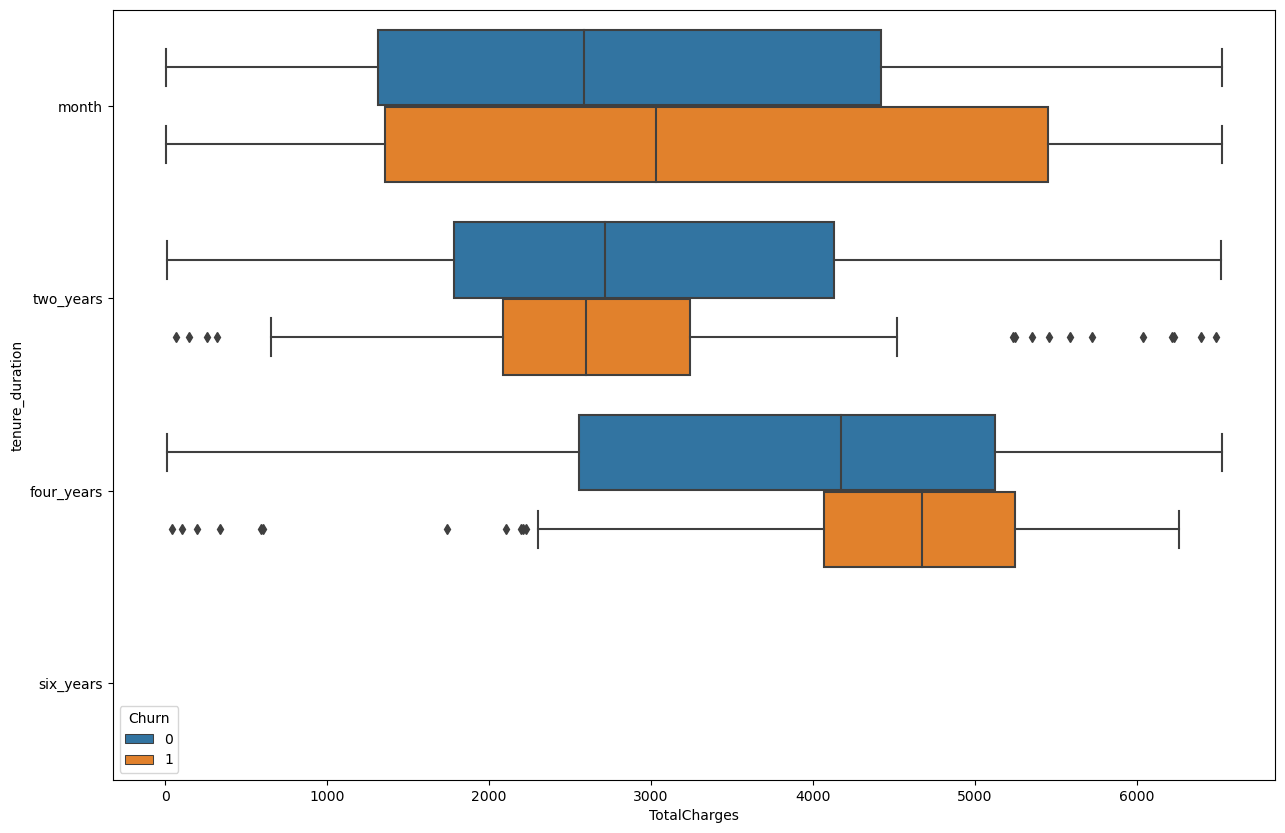

In [98]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='TotalCharges', y= 'tenure_duration', hue='Churn', data=df);

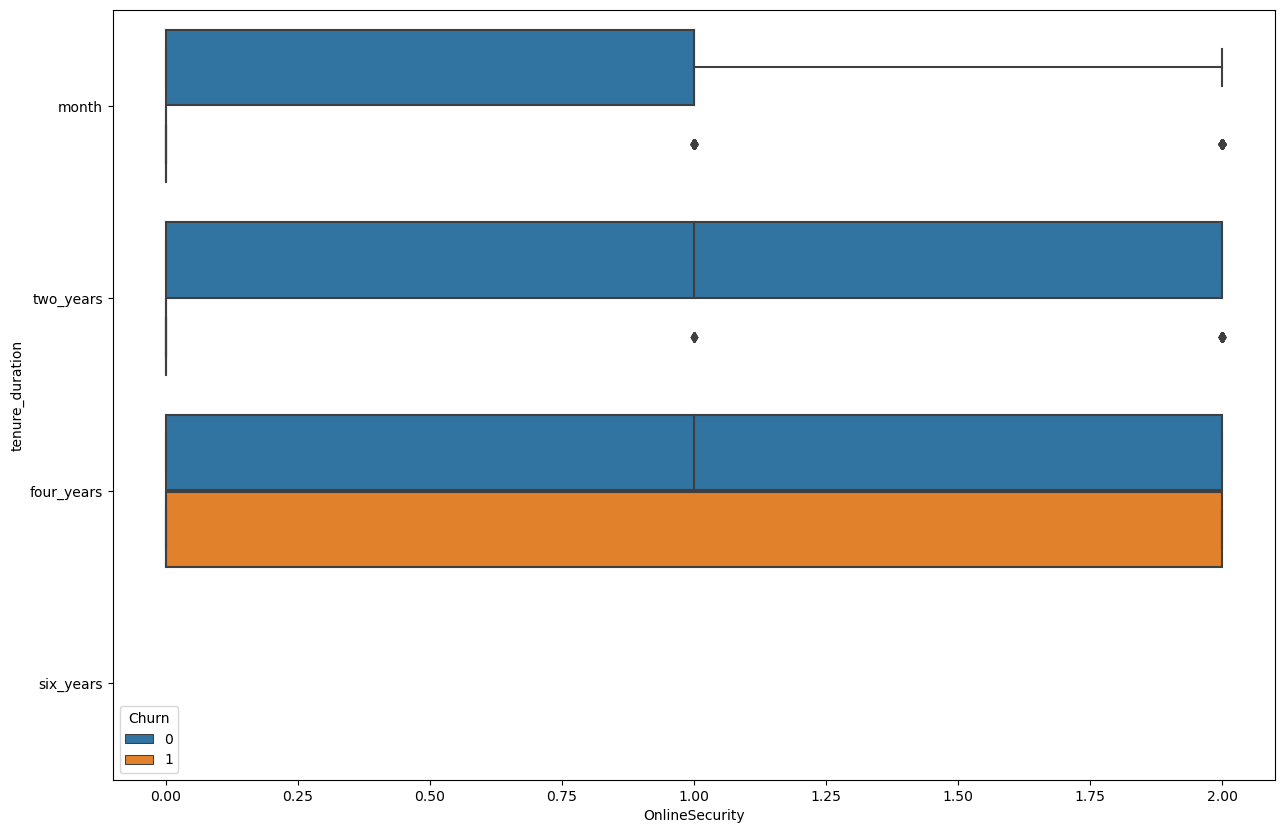

In [99]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='OnlineSecurity', y= 'tenure_duration', hue='Churn', data=df);

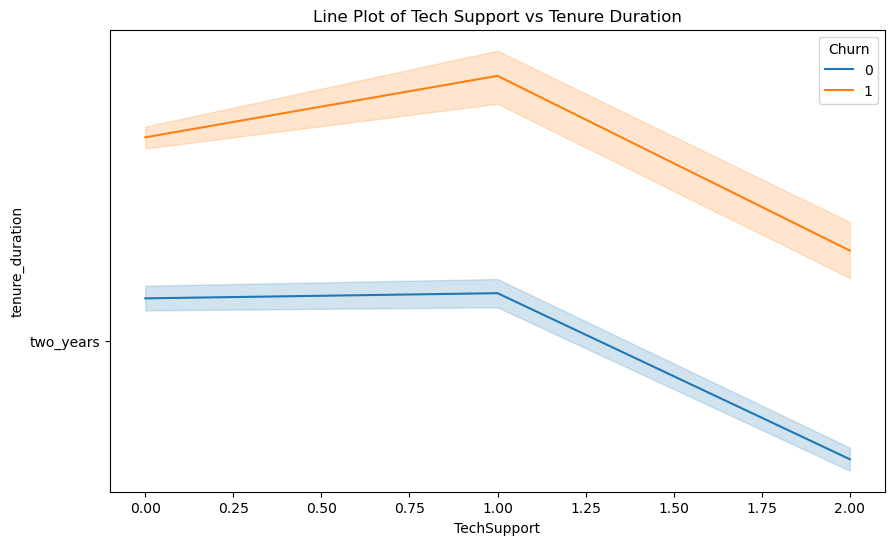

In [100]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='TechSupport', y='tenure_duration', hue='Churn', data=df)
plt.title('Line Plot of Tech Support vs Tenure Duration')
plt.show()

In [53]:
# Find maximum value
max_total_charges = df["TotalCharges"].max()

# Find minimum value
min_total_charges = df["TotalCharges"].min()

print("Maximum Total Charges:", max_total_charges)
print("Minimum Total Charges:", min_total_charges)


Maximum Total Charges: 6530
Minimum Total Charges: 0


In [102]:
# Define the number of bins
num_bins = 5

# Create bins for 'TotalCharges'
bins = pd.cut(df["TotalCharges"], bins=5)

# Display the bin counts
bin_counts = bins.value_counts()
print(bin_counts)

TotalCharges
(1306.0, 2612.0]    1486
(5224.0, 6530.0]    1433
(2612.0, 3918.0]    1381
(-6.53, 1306.0]     1373
(3918.0, 5224.0]    1370
Name: count, dtype: int64


In [182]:
# Total_Charges
#df["Total_Charges"] = pd.cut(df["TotalCharges"], bins=[0, 1306, 2612, 3918, 5224, float('inf')], labels=['extremely_low_charges', 'low_charges','medium_charge','high_charges','very_high_charges'])
#df["Total_Charges"].value_counts()

# Define bins and labels for total charges
bins = [0, 1306, 2612, 3918, 5224, float('inf')]
labels = ['extremely_low_charges', 'low_charges', 'medium_charge', 'high_charges', 'very_high_charges']

# Cut the "TotalCharges" column into total charges categories
df["Total_Charges"] = pd.cut(df["TotalCharges"], bins=bins, labels=labels)

# Display the count of each total charges category
df["Total_Charges"].value_counts()



Total_Charges
low_charges              1486
very_high_charges        1433
medium_charge            1381
high_charges             1370
extremely_low_charges    1362
Name: count, dtype: int64

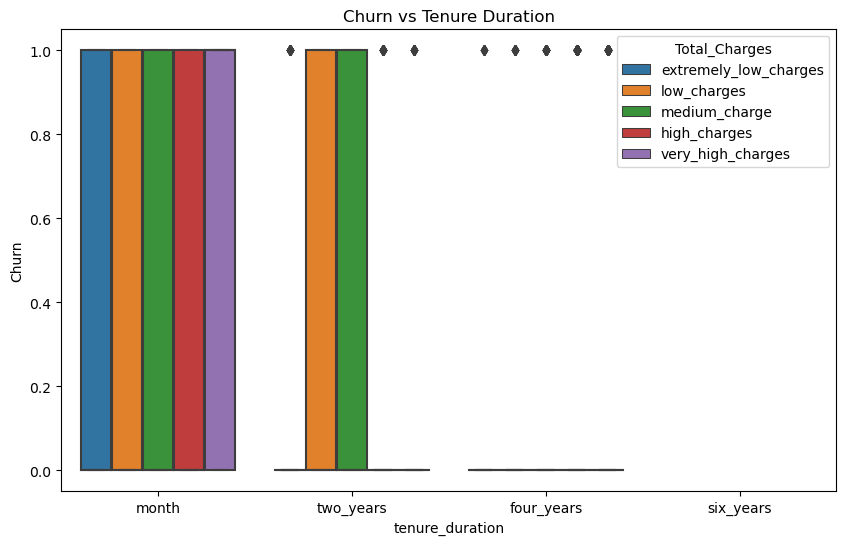

In [183]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='tenure_duration', y='Churn', hue='Total_Charges', data=df)
plt.title('Churn vs Tenure Duration')
plt.show()

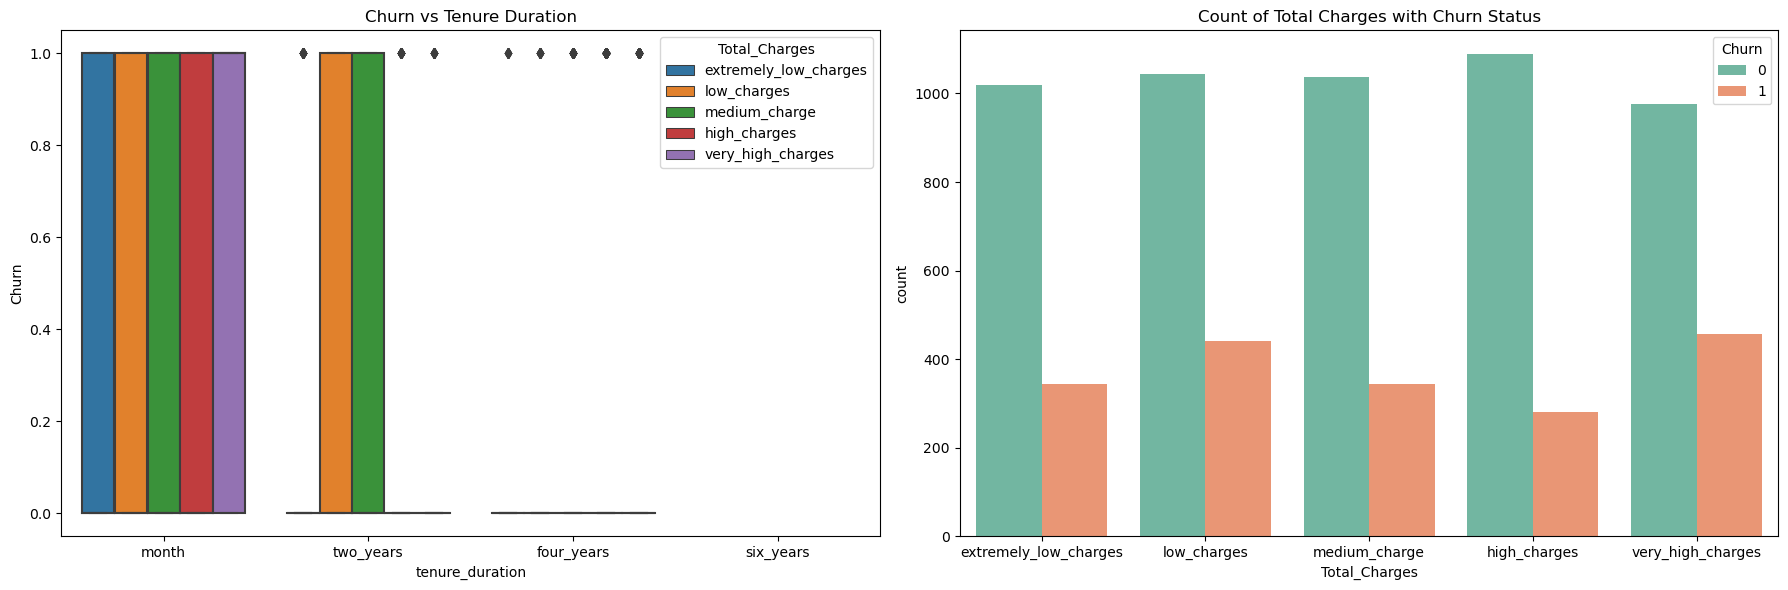

In [184]:

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Boxplot
sns.boxplot(x='tenure_duration', y='Churn', hue='Total_Charges', data=df, ax=ax1)
ax1.set_title('Churn vs Tenure Duration')

# Countplot for Total Charges
sns.countplot(x='Total_Charges', data=df, ax=ax2, hue='Churn', palette='Set2')
ax2.set_title('Count of Total Charges with Churn Status')

# Adjust layout
plt.tight_layout()
plt.show()

In [185]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_duration,Total_Charges
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,1,2,29.85,2505,0,month,low_charges
1,3962,1,0,0,0,34,1,0,0,2,...,0,0,1,0,3,56.95,1466,0,two_years,low_charges


In [186]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_duration', 'Total_Charges'],
      dtype='object')

In [187]:
adams_df = df [['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]

Quit = df[['Churn']]

In [188]:
adams_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660


In [159]:
Quit

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [126]:
adams_df.dtypes

customerID            int32
gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
dtype: object

## Machine learning 

#### Analyze the results of trained models using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.

In [190]:
#Spliting of dataset int training and testing 

X_train, X_test, y_train, y_test = train_test_split(adams_df, Quit,test_size=0.2, random_state=42)


In [191]:
 # Model Building 

# Logistics Regression

l_r = LogisticRegression()

l_r.fit(X_train, y_train)

l_pred = l_r.predict(X_test)

print('Logistic Regression')
print('Accuracy:', accuracy_score(y_test,l_pred))
print('Precision:', precision_score(y_test,l_pred))
print('Recall:', recall_score(y_test,l_pred))
print('F1-score:', f1_score(y_test,l_pred))
print('AUC-ROC:', roc_auc_score(y_test,l_pred))

Logistic Regression
Accuracy: 0.8140525195173882
Precision: 0.6796116504854369
Recall: 0.5630026809651475
F1-score: 0.6158357771260998
AUC-ROC: 0.733721417702651


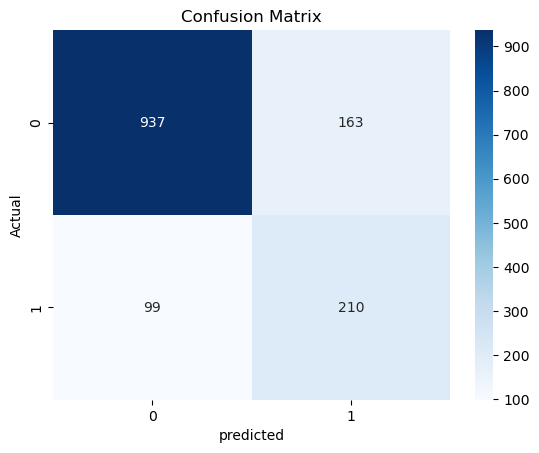

In [161]:
# Confusion Matrix

lcm = confusion_matrix(l_pred, y_test)

# Visualization in Confusion Matrix
sns.heatmap(lcm, annot=True,cmap = 'Blues', fmt = 'g')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [149]:
l_pred

array([1, 0, 0, ..., 0, 0, 0])

In [150]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


##

- from sklearn.neighbors import KNeighborsClassifier
- from sklearn.ensemble import RandomForestClassifier
- from sklearn.linear_model import LogisticRegression
- from sklearn.svm import SVC
- from sklearn.ensemble import GradientBoostingClassifier

In [194]:
#Train the model
Gbc = GradientBoostingClassifier()

# Fit the model to the training data
Gbc.fit(X_train, y_train)

# Predict labels for the test data
Gbc_pred = Gbc.predict(X_test)

# Print evaluation metrics
print('GradientBoostingClassifier')
print('Accuracy:', accuracy_score(y_test, Gbc_pred))
print('Precision:', precision_score(y_test, Gbc_pred))
print('Recall:', recall_score(y_test, Gbc_pred))
print('F1-score:', f1_score(y_test, Gbc_pred))
print('AUC-ROC:', roc_auc_score(y_test, Gbc_pred))

GradientBoostingClassifier
Accuracy: 0.8112136266855926
Precision: 0.6851211072664359
Recall: 0.5308310991957105
F1-score: 0.5981873111782477
AUC-ROC: 0.7214966306789363


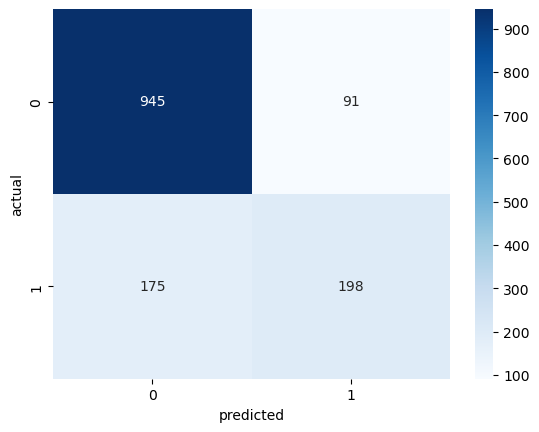

In [195]:
Gbc = confusion_matrix(y_test,Gbc_pred)

# Visualize the confusion matrix
sns.heatmap(Gbc,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [162]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rcf_pred = rfc.predict(X_test)

print('Random Forest Classifier')
print('Accuracy:', accuracy_score(y_test, rcf_pred))
print('Precision:', precision_score(y_test, rcf_pred))
print('Recall:', recall_score(y_test, rcf_pred))
print('F1-score:', f1_score(y_test, rcf_pred))
print('AUC-ROC:', roc_auc_score(y_test, rcf_pred))


Random Forest Classifier
Accuracy: 0.7970191625266146
Precision: 0.6629213483146067
Recall: 0.4745308310991957
F1-score: 0.553125
AUC-ROC: 0.6938291221133044


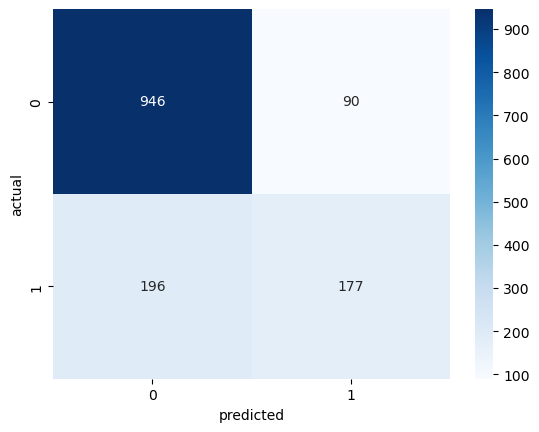

In [164]:
rfc = confusion_matrix(y_test,rcf_pred)

# Visualize the confusion matrix
sns.heatmap(rfc,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [196]:
#Train the model
Svm = SVC()

# Fit the model to the training data
Svm.fit(X_train, y_train)

# Predict labels for the test data
Svm_pred = Svm.predict(X_test)

# Print evaluation metrics
print('SVC')
print('Accuracy:', accuracy_score(y_test, Svm_pred))
print('Precision:', precision_score(y_test, Svm_pred))
print('Recall:', recall_score(y_test, Svm_pred))
print('F1-score:', f1_score(y_test, Svm_pred))
print('AUC-ROC:', roc_auc_score(y_test, Svm_pred))

SVC
Accuracy: 0.7352732434350603
Precision: 0.0
Recall: 0.0
F1-score: 0.0
AUC-ROC: 0.5


### The evaluation results indicate that the SVC model has poor performance in correctly identifying positive instances. 
### It shows a lack of balance between precision and recall, with both metrics being extremely low, and its ability to discriminate between positive and negative instances is no better than random guessing. Further analysis and refinement of the model are needed to improve its performance.

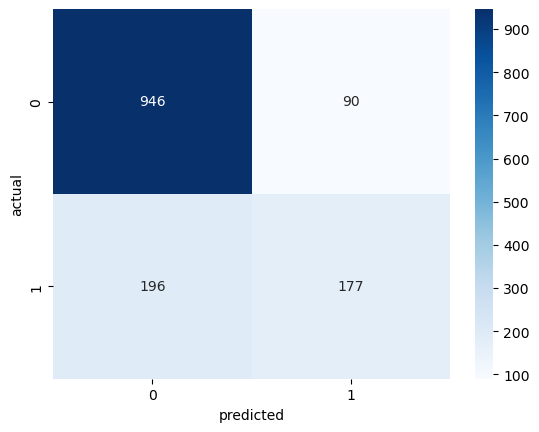

In [197]:
Svm = confusion_matrix(y_test,rcf_pred)

# Visualize the confusion matrix
sns.heatmap(Svm,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');

In [201]:

# Create a Decision Tree Classifier object
dt_classifier = DecisionTreeClassifier()

# Train the model
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.716820440028389
Precision: 0.46368715083798884
Recall: 0.4450402144772118
F1-score: 0.4541723666210671
ROC-AUC: 0.6298560145745132


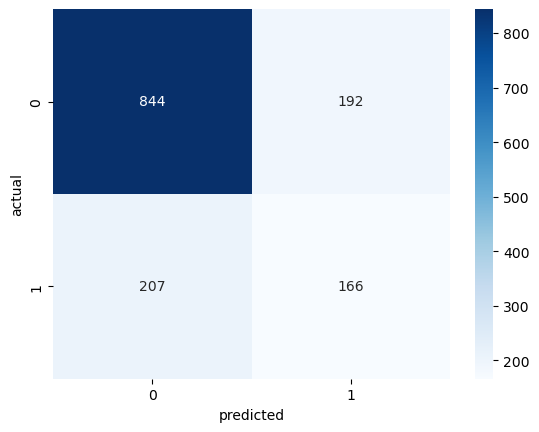

In [202]:
dt_classifier = confusion_matrix(y_test,y_pred)

# Visualize the confusion matrix
sns.heatmap(dt_classifier,annot=True,cmap='Blues',fmt='g')
plt.xlabel('predicted')
plt.ylabel('actual');